<a href="https://colab.research.google.com/github/tanu-yadav00/tanu_cognorise_infotech/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import torch
from torch import nn
import torch.nn.functional as F



In [ ]:
titanic = pd.read_csv("/content/tested.csv")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
titanic.isna().sum() / len(titanic) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings

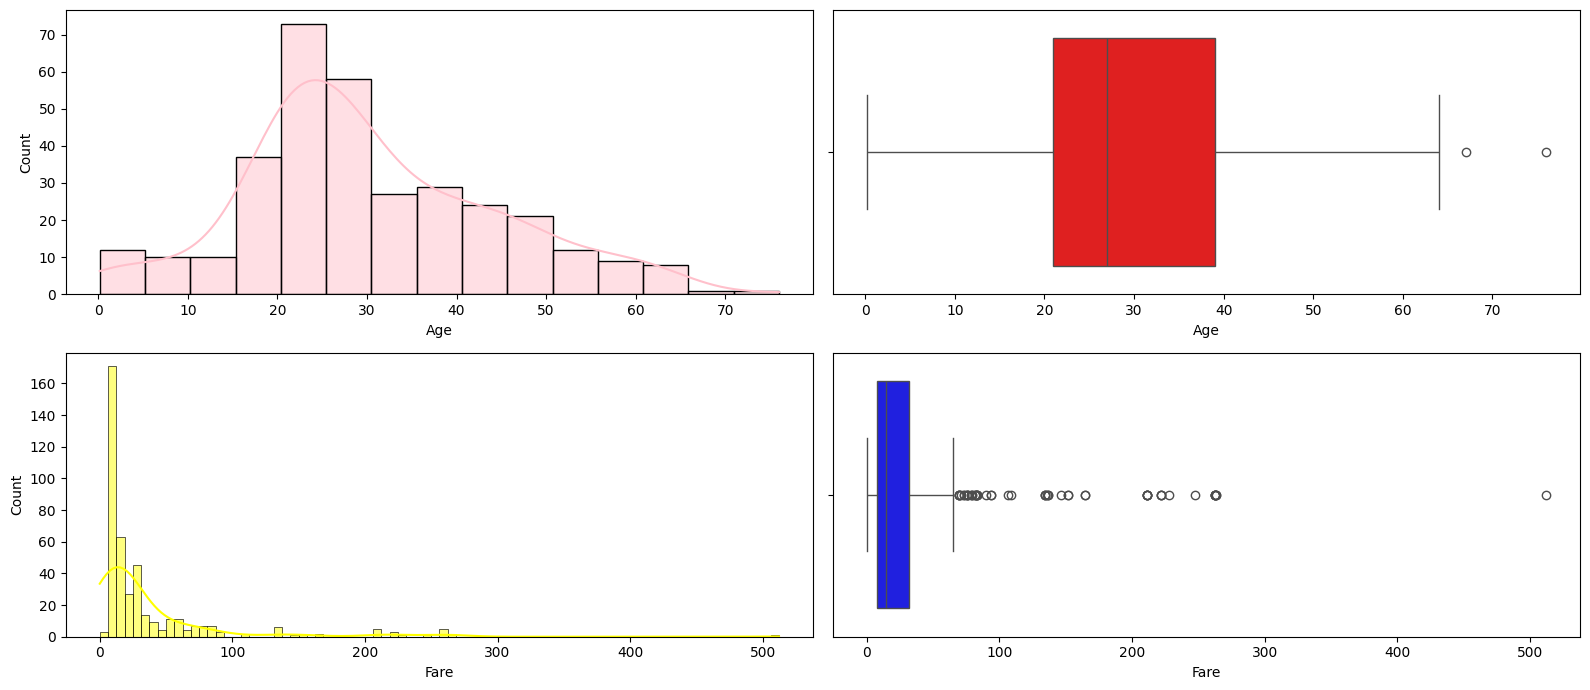

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

plt.subplot(2, 2, 1)
sns.histplot(titanic['Age'], color='Pink', kde=True)
plt.subplot(2, 2, 2)
sns.boxplot(x=titanic['Age'], color='red')

plt.subplot(2, 2, 3)
sns.histplot(titanic['Fare'], color='yellow', kde=True)
plt.subplot(2, 2, 4)
sns.boxplot(x=titanic['Fare'], color='Blue')

plt.tight_layout()
plt.show()

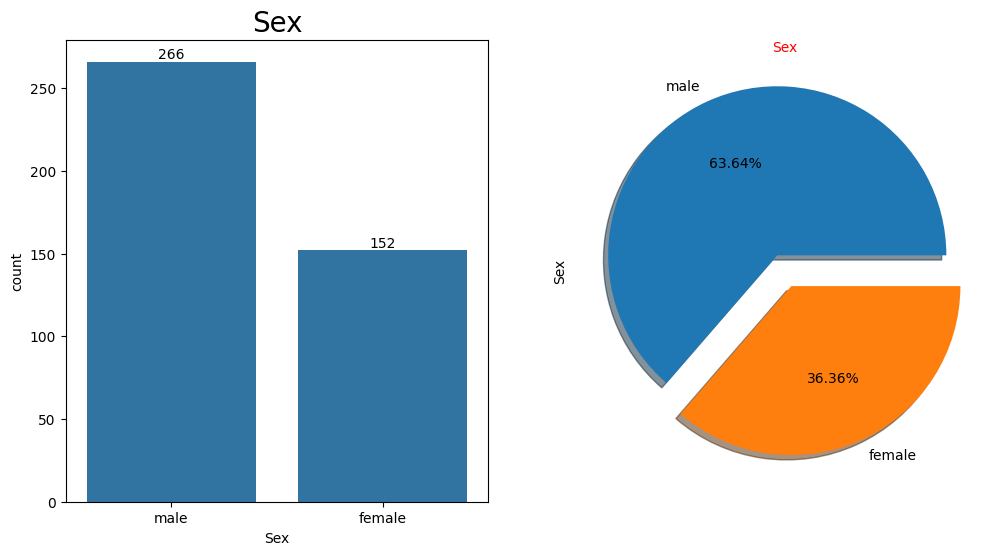

In [ ]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=titanic)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)
ax =plt.subplot(1,2,2)
ax=titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

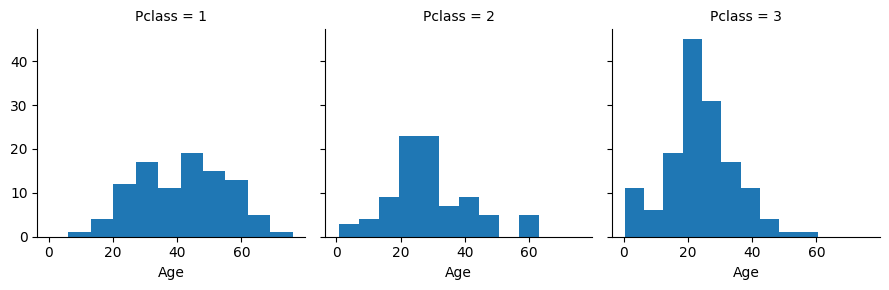

In [ ]:
g = sns.FacetGrid(titanic, col="Pclass")
g = g.map(plt.hist, "Age")

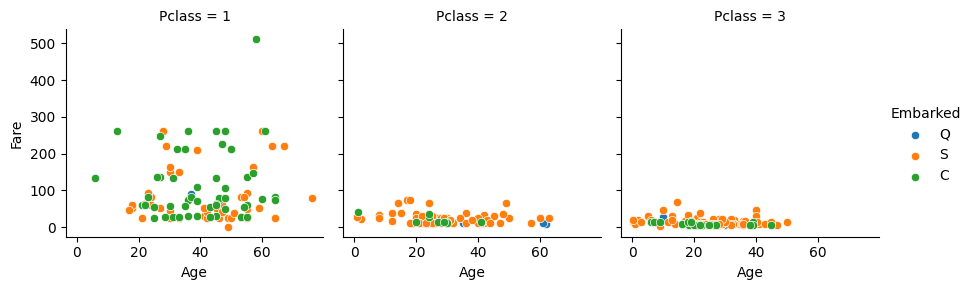

In [ ]:
g = sns.FacetGrid(titanic, col="Pclass", hue="Embarked")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


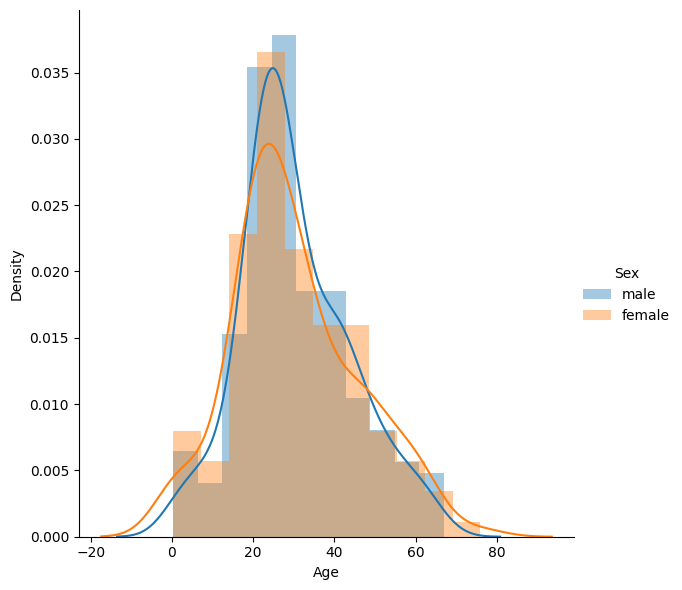

In [ ]:
sns.FacetGrid(titanic, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


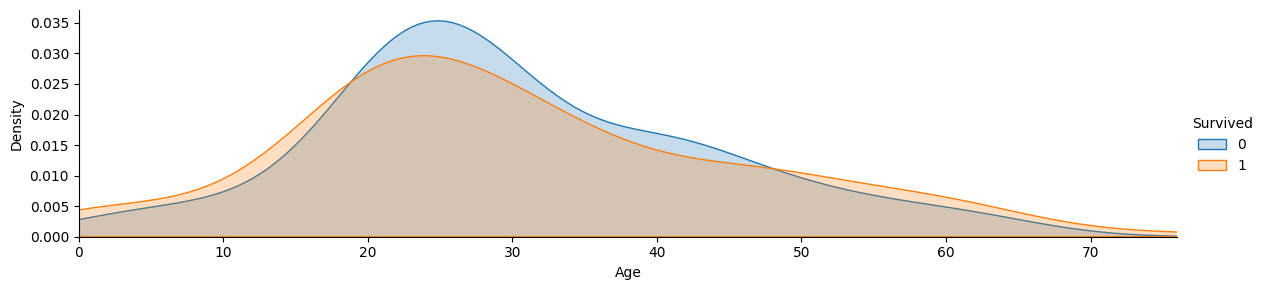

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(titanic, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

<ipython-input-21-f618ef991531>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'],color="g")


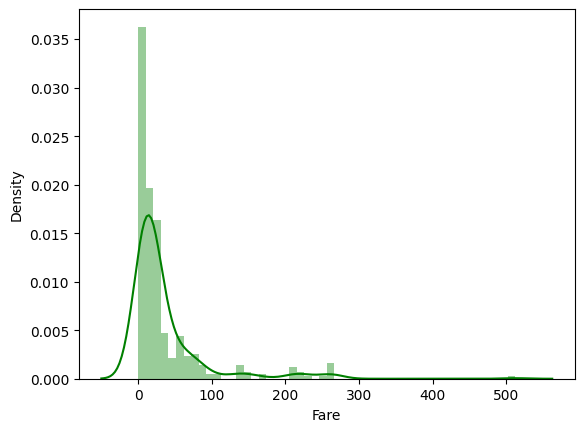

In [ ]:
sns.distplot(titanic['Fare'],color="g")
plt.show()

<ipython-input-22-1d4f79e05c1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'],color="r",bins=20,kde=True,)


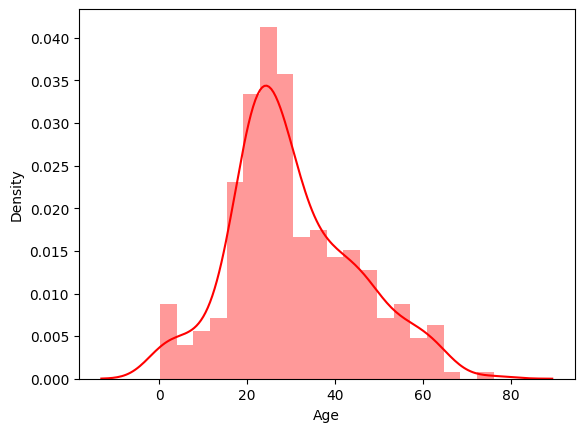

In [ ]:
sns.distplot(titanic['Age'],color="r",bins=20,kde=True,)
plt.show()

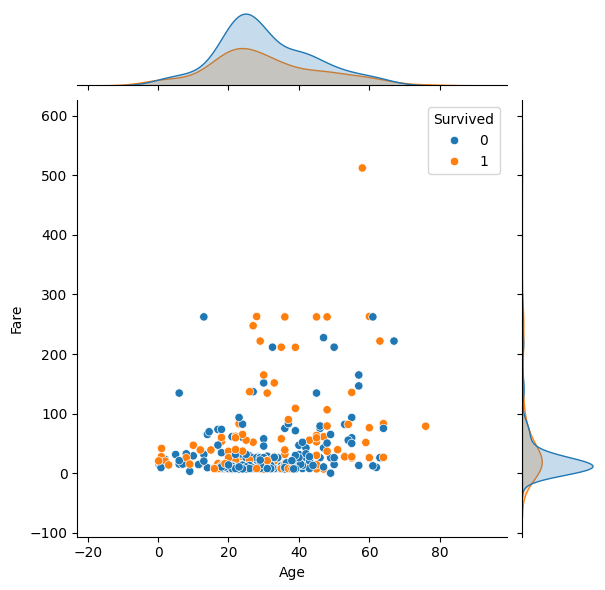

In [ ]:
sns.jointplot(x="Age",y="Fare",data=titanic,color="olive",hue="Survived")
plt.show()

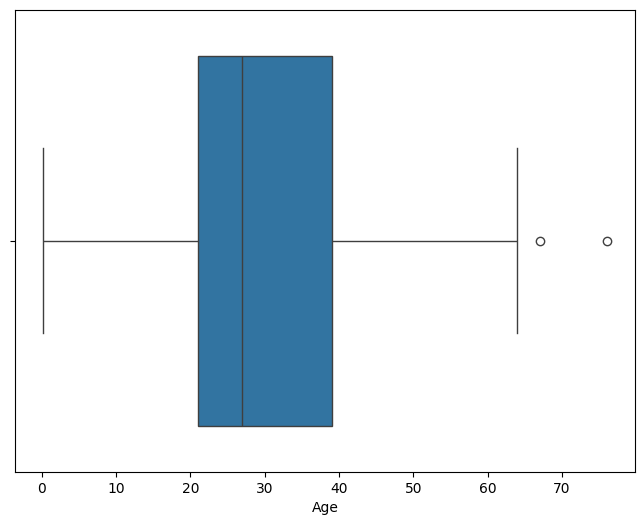

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=titanic["Age"])
plt.show()

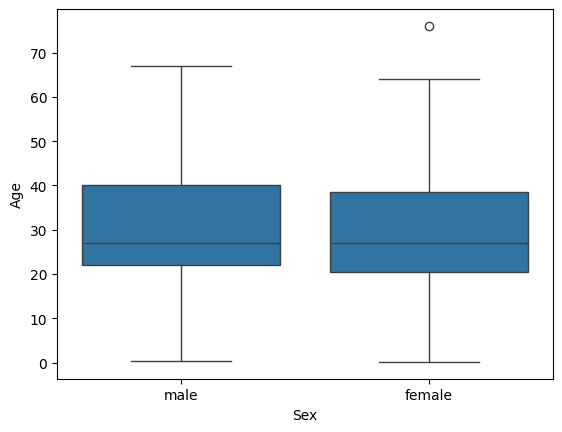

In [ ]:
sns.boxplot(x='Sex', y = 'Age',data= titanic)
plt.show()

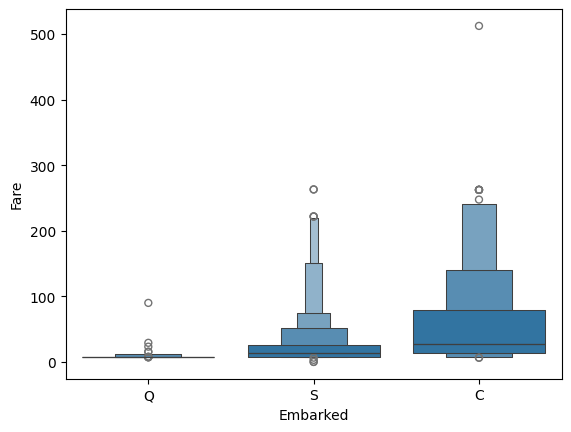

In [ ]:
sns.boxenplot(y="Fare", x="Embarked", data=titanic)
plt.show()

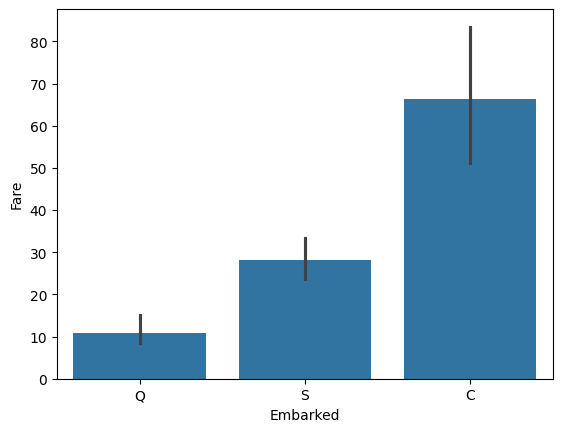

In [ ]:
sns.barplot(y='Fare',x='Embarked',data=titanic)
plt.show()

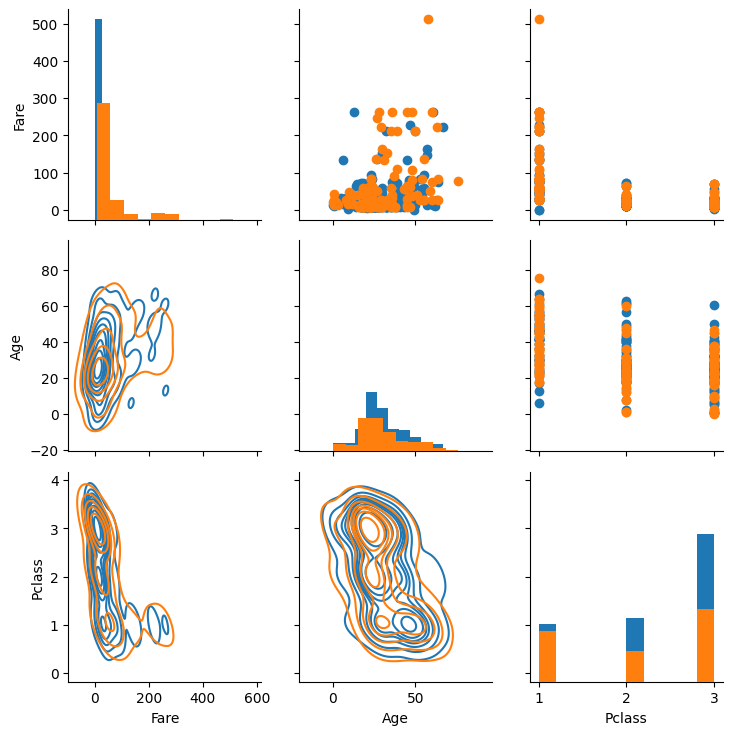

In [ ]:
titanic_g = sns.PairGrid(titanic,hue='Sex',vars=['Fare','Age','Pclass'])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)
plt.show()

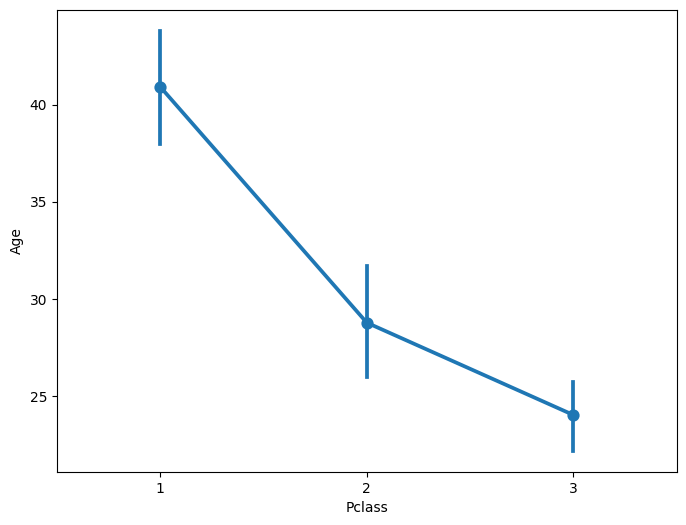

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="Pclass", y="Age", data=titanic)
plt.show()

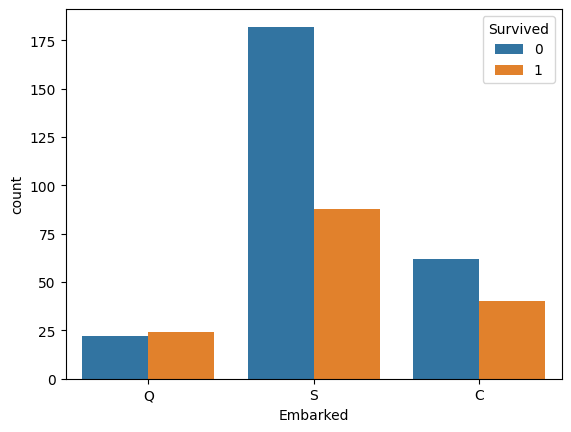

In [ ]:
sns.countplot(data = titanic,x= 'Embarked',hue='Survived')
plt.show()

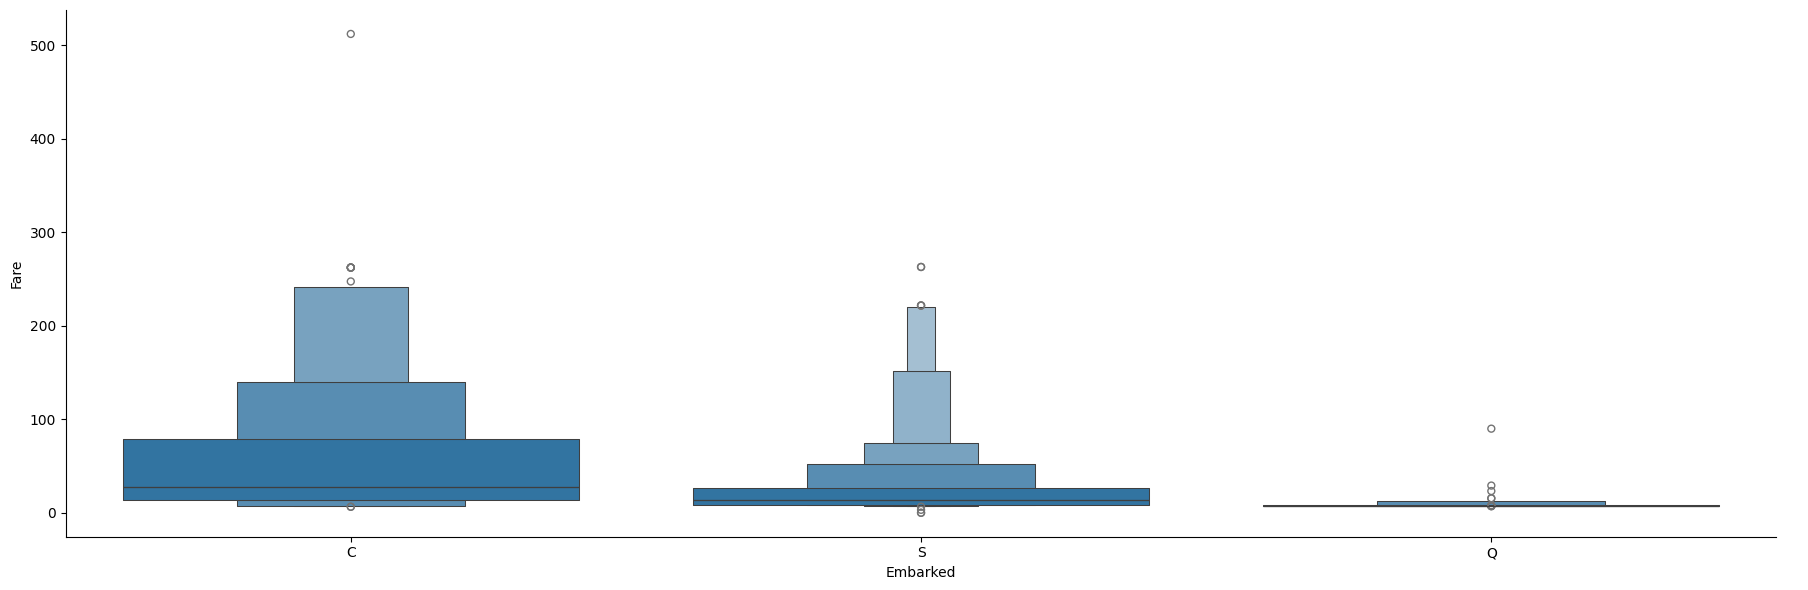

In [ ]:
# Airline vs Price
sns.catplot(y = "Fare", x = "Embarked", data = titanic.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

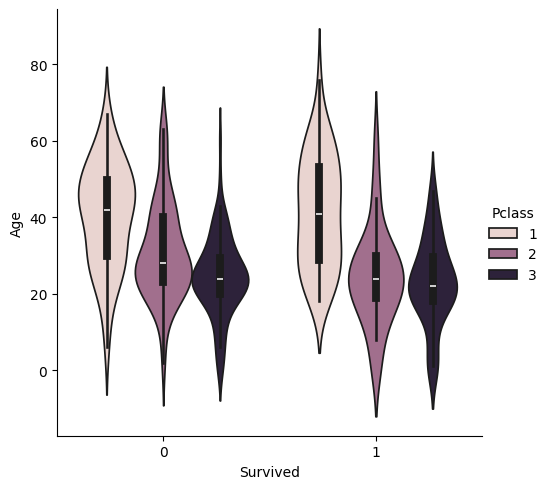

In [ ]:
sns.catplot(data=titanic,x='Survived',y='Age',hue='Pclass',kind="violin")
plt.show()

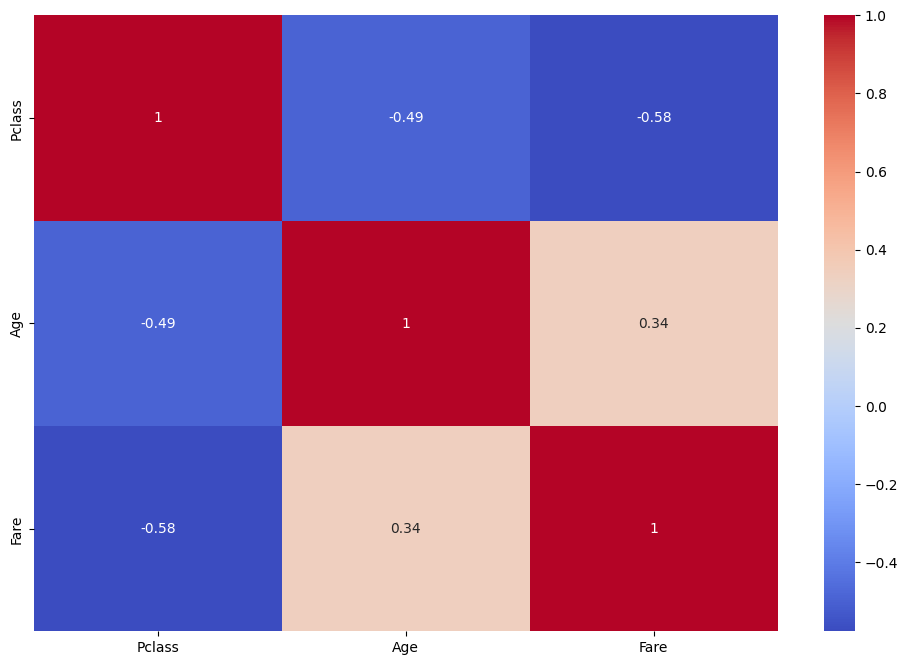

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'titanic' is your DataFrame
numeric_columns = titanic.select_dtypes(include=[np.number])
hig_corr = numeric_columns.corr()

hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns[hig_corr_features].corr(), annot=True, cmap="coolwarm")
plt.show()

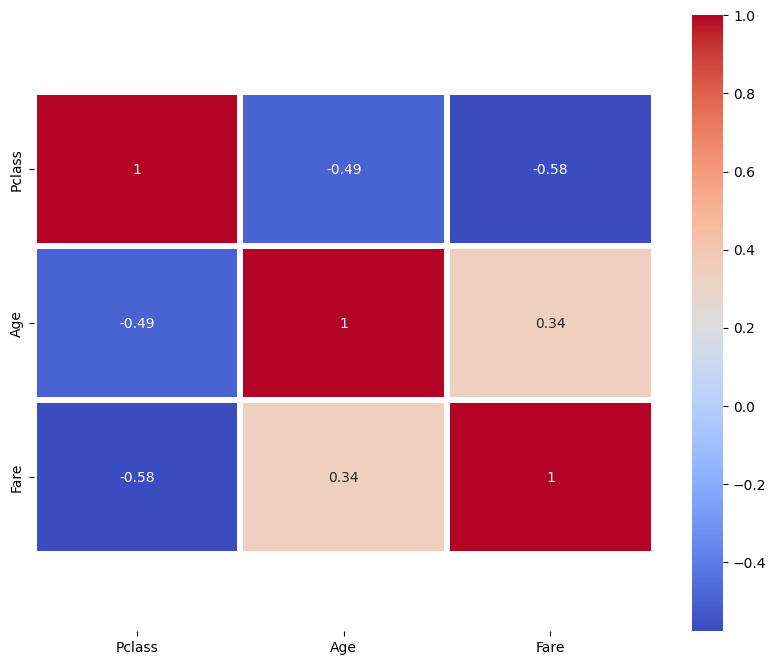

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(titanic[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

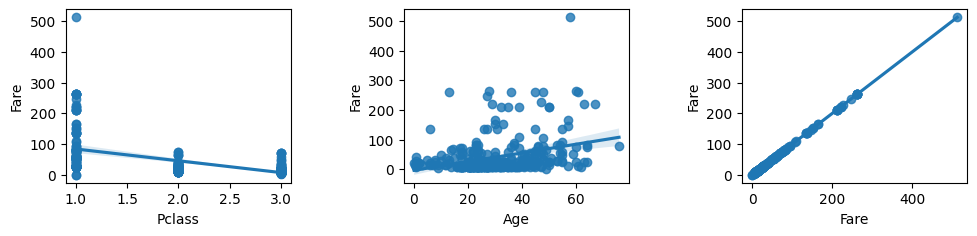

In [ ]:
# Plot regplot to get the nature of highly correlated data

plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=titanic, x = hig_corr_features[i], y = 'Fare')
plt.show()

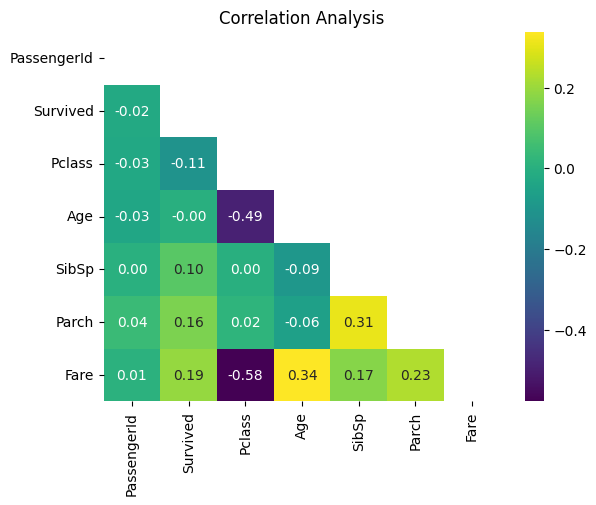

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Name' is a non-numeric column, you can exclude it
numeric_columns = titanic.select_dtypes(include=[np.number])
corr = numeric_columns.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr, mask=mask, annot=True, lw=0, linecolor='white', cmap='viridis', fmt="0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

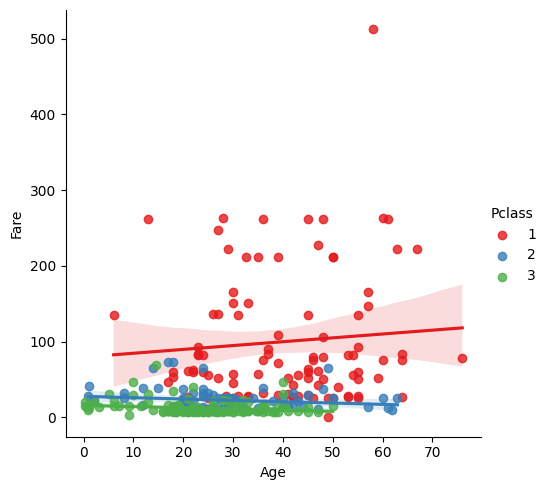

In [ ]:
g= sns.lmplot(x="Age", y="Fare", hue="Pclass", data=titanic, palette="Set1")

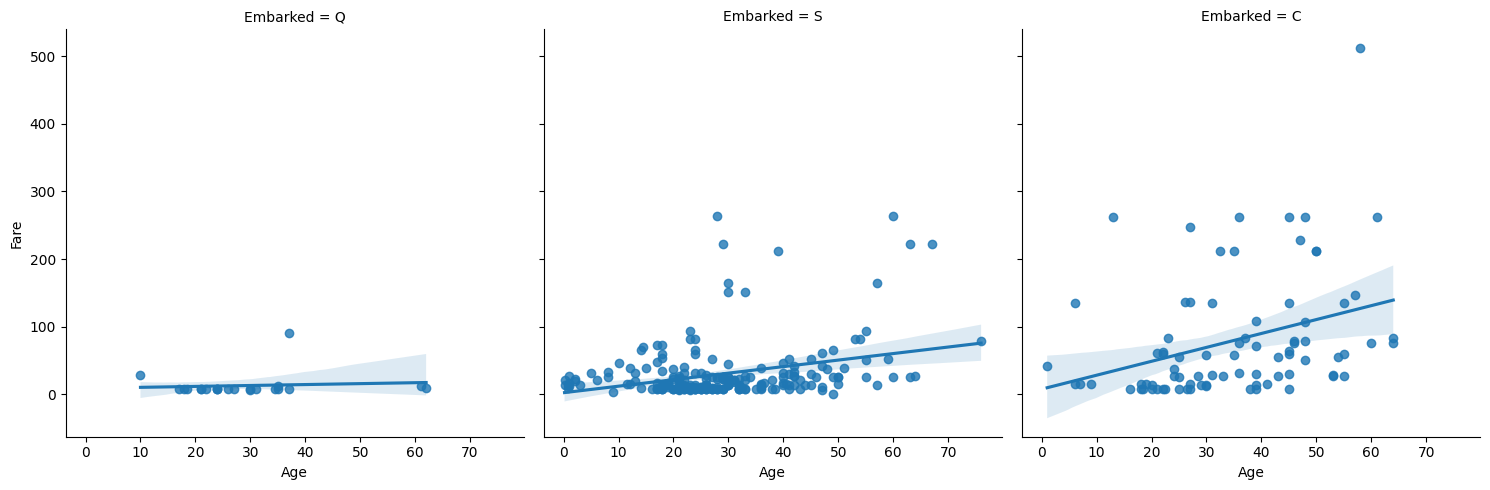

In [ ]:
g= sns.lmplot(x="Age", y="Fare", col="Embarked", data=titanic)

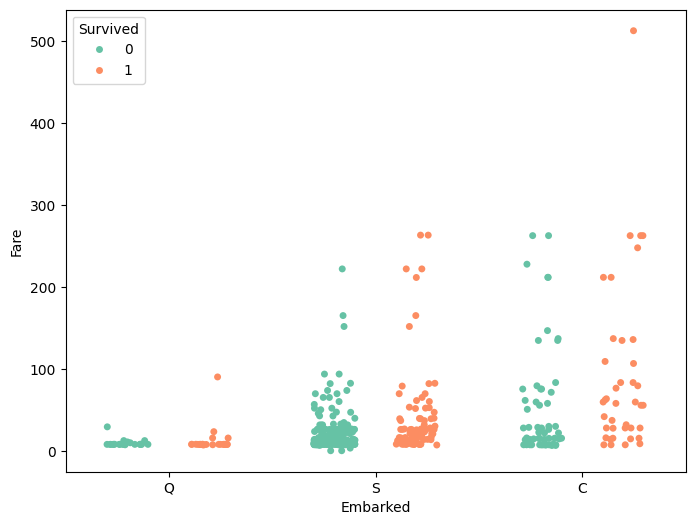

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="Embarked", y="Fare", hue="Survived",data=titanic, jitter=0.2, palette="Set2", dodge=True)
plt.show()

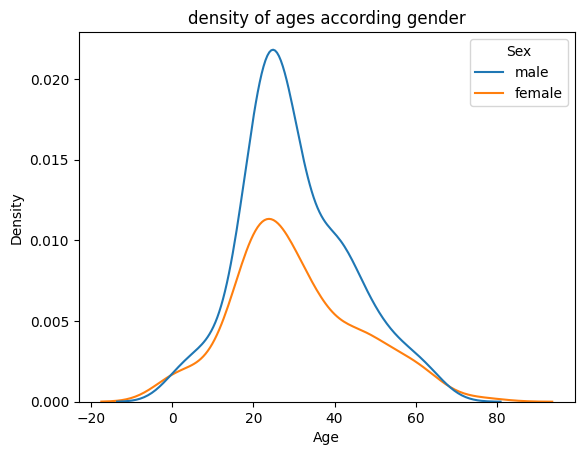

In [ ]:
#what average of ages in each categorey
sns.kdeplot(data = titanic , x ="Age" , hue ="Sex" )
plt.title("density of ages according gender")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.0% of the points cannot be place

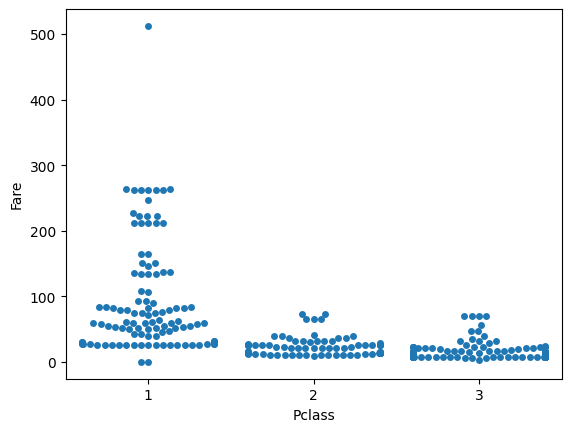

In [ ]:
sns.swarmplot(x="Pclass", y="Fare", data=titanic)
plt.show()

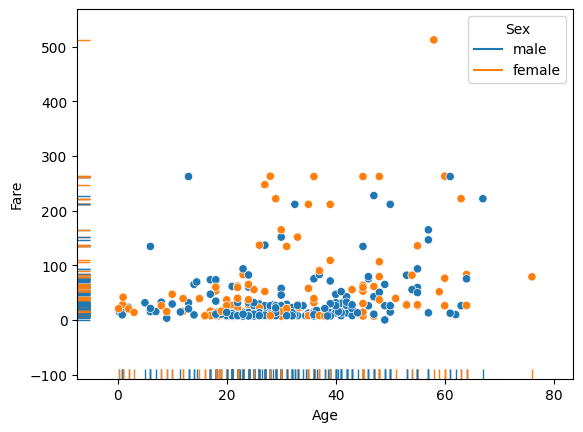

In [ ]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Sex")
sns.rugplot(data=titanic, x="Age", y="Fare", hue="Sex")
plt.show()

data preprocessing

In [ ]:
## Finding the Null value in data
titanic.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [ ]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [ ]:
missing(titanic)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


different ways to visualize missing values

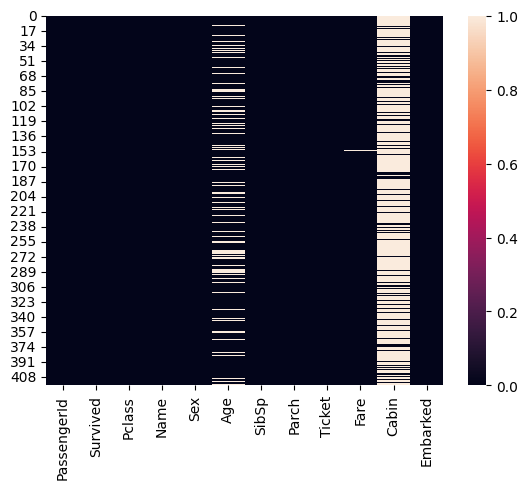

In [ ]:
sns.heatmap(titanic.isnull());

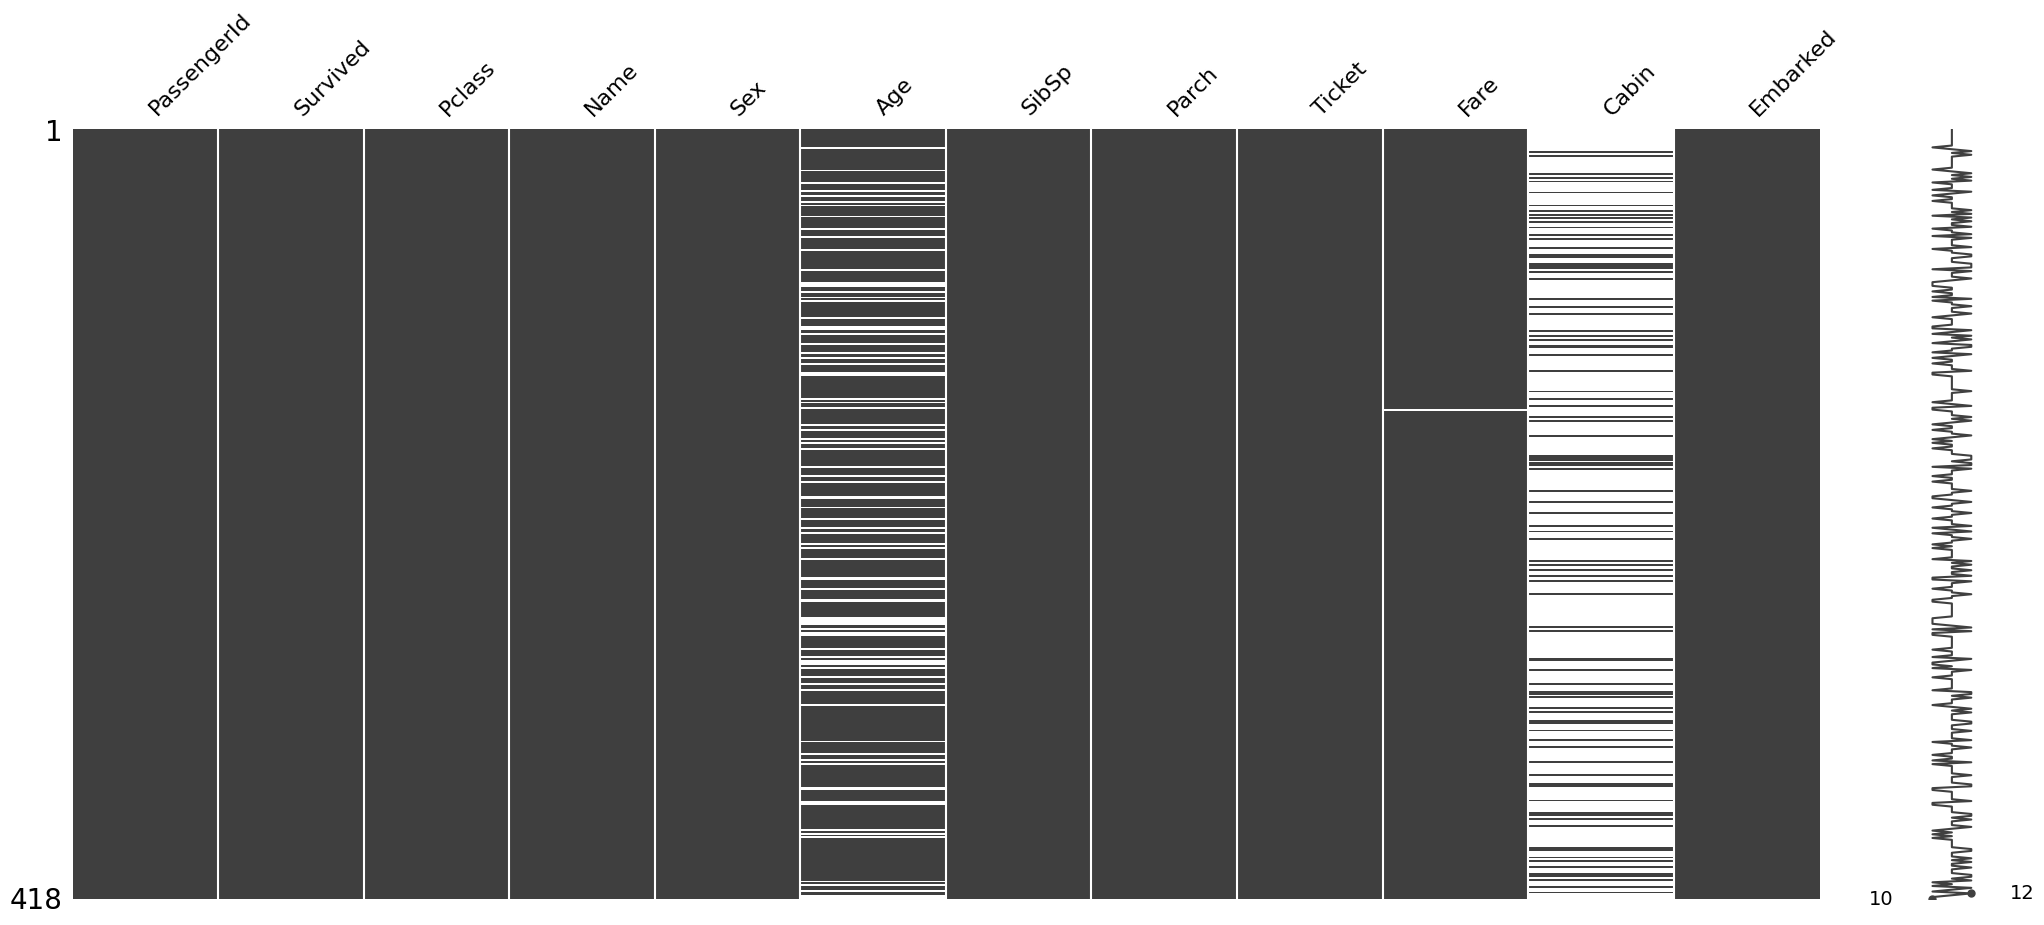

In [ ]:
import missingno as msno
msno.matrix(titanic)
plt.show()

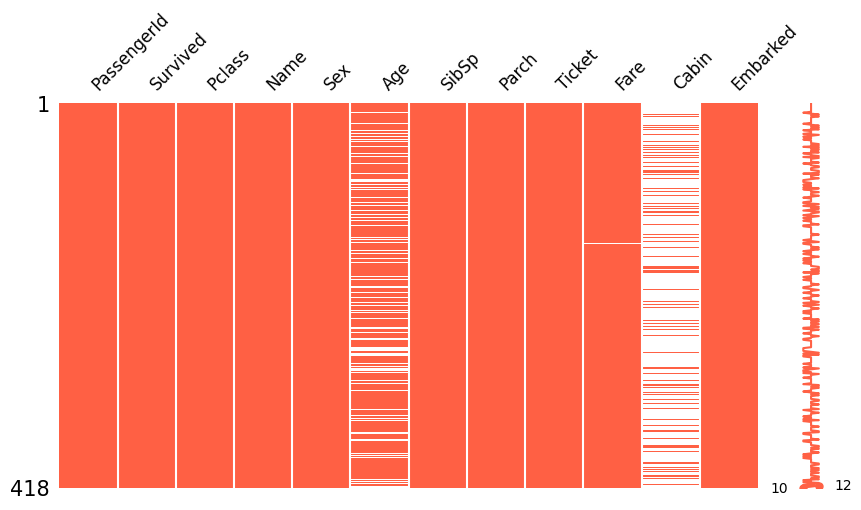

In [ ]:
msno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

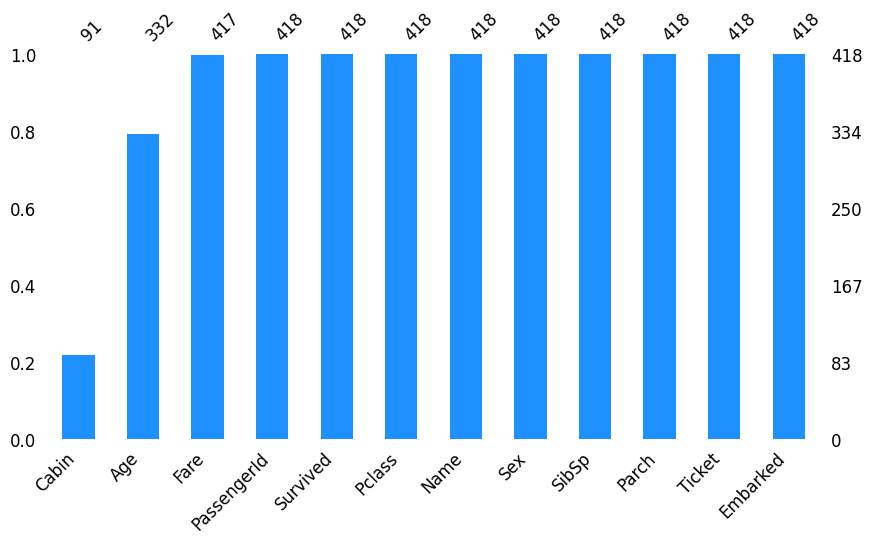

In [ ]:
msno.bar(titanic, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

removing the null value from the dataset

In [ ]:
# Filled the missing value in Age column with the mean value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

# Filled the missing value in Fare columns with mean Value
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

# Filled the missing value in Embarked columns with backfill method
titanic['Embarked'] = titanic['Embarked'].fillna(method='backfill')

In [ ]:
# Drop the columns
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S


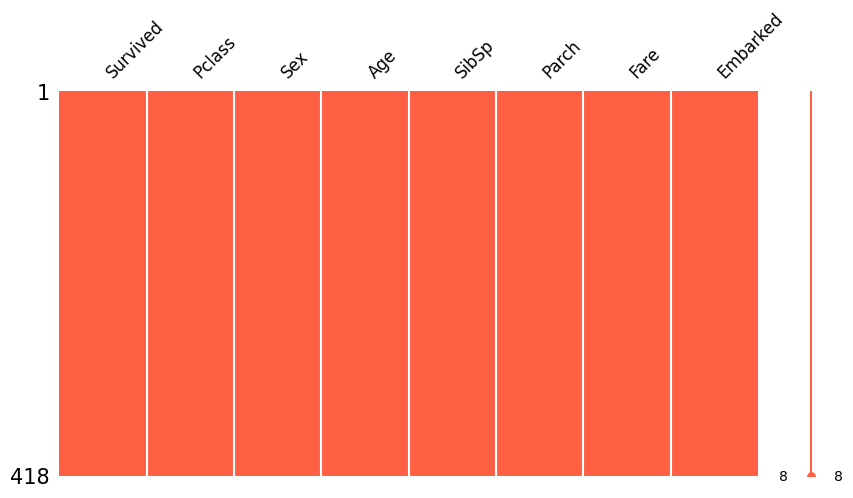

In [ ]:
msno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

Categorical value is converted into numerical value by using categorical_encoder

In [ ]:
# Converting the categorical variable into the numerical variable by using category_encoder
!pip install category_encoders
from category_encoders import OrdinalEncoder
encoder = OrdinalEncoder(cols=['Survived', 'Pclass', 'Sex', 'Embarked'])
titanic_encoded = encoder.fit_transform(titanic)
titanic_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2


In [ ]:
X = titanic_encoded.drop(['Survived'],axis=1)
y = titanic['Survived']

splitting train and test set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,2,64.00,0,2,83.1583,3
201,1,1,0.33,0,2,14.4000,2
336,2,1,32.00,0,0,13.0000,2
187,1,1,17.00,2,0,8.0500,2
214,1,2,38.00,4,2,7.7750,2


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

model implementation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[76  0]
 [ 0 50]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_lr) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred_lr)))

Logistic Regression Accuracy:  100.0%
MAE: 0.0
MSE: 0.0
RMSE: 0.0


random forest classifier (criterion=entropy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126




random forest classifier (criterion=gini)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='gini',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



Naive Baye's GaussianNB Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Gnb = GaussianNB()
Gnb.fit(X_train,y_train)
y_pred_Gnb = Gnb.predict(X_test)

print("Training set score: {:.2f}".format(Gnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Gnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Gnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Gnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Gnb))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



Naive Baye's BernoulliNB Classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Bnb = BernoulliNB()
Bnb.fit(X_train,y_train)
y_pred_Bnb = Bnb.predict(X_test)

print("Training set score: {:.2f}".format(Bnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Bnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Bnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Bnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Bnb))

Training set score: 0.68
Test set score: 0.63
Accuracy Score: 0.63
Confusion Matrix: 
 [[65 11]
 [35 15]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.65      0.86      0.74        76
           1       0.58      0.30      0.39        50

    accuracy                           0.63       126
   macro avg       0.61      0.58      0.57       126
weighted avg       0.62      0.63      0.60       126



multi layer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_mlp)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_mlp))
print("Classification_Report: \n",classification_report(y_test,y_pred_mlp))

Training set score: 0.96
Test set score: 0.94
Accuracy Score: 0.94
Confusion Matrix: 
 [[76  0]
 [ 7 43]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        76
           1       1.00      0.86      0.92        50

    accuracy                           0.94       126
   macro avg       0.96      0.93      0.94       126
weighted avg       0.95      0.94      0.94       126



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


k-nearest neighbor(n=9)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_knn)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training set score: 0.72
Test set score: 0.65
Accuracy Score: 0.65
Confusion Matrix: 
 [[67  9]
 [35 15]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        76
           1       0.62      0.30      0.41        50

    accuracy                           0.65       126
   macro avg       0.64      0.59      0.58       126
weighted avg       0.64      0.65      0.61       126



Extra Tree Classifier (n_estimators=500)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

print("Training set score: {:.2f}".format(et_100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(et_100.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_et_100)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_et_100))
print("Classification_Report: \n",classification_report(y_test,y_pred_et_100))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



support vector classifier(kernel=linear)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_linear = SVC(kernel='linear',gamma='auto',probability=True)
svc_linear.fit(X_train,y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

print("Training set score: {:.2f}".format(svc_linear.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_linear.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_linear)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc_linear))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_linear))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



support vector classifier(kernel=rbf)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_rbf = SVC(kernel = "rbf", gamma=2, C=1)
svc_rbf.fit(X_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test)

print("Training set score: {:.2f}".format(svc_rbf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_rbf.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_rbf)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc_rbf))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_rbf))

Training set score: 1.00
Test set score: 0.65
Accuracy Score: 0.65
Confusion Matrix: 
 [[76  0]
 [44  6]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.63      1.00      0.78        76
           1       1.00      0.12      0.21        50

    accuracy                           0.65       126
   macro avg       0.82      0.56      0.49       126
weighted avg       0.78      0.65      0.55       126



decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

print("Training set score: {:.2f}".format(decc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_decc))
print("Classification_Report: \n",classification_report(y_test,y_pred_decc))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

